In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Loading the dataset
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
# Data Cleaning

In [8]:
#checking missing values
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

There are 19456 missing values in the HDI for year column

In [9]:
# dropping missing values in the HDI for year column

df = df.dropna()

In [10]:
# Confirming missing values
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [11]:
# Feature Engineering
# Suicide proportion
df['suicide_proportion'] = df['suicides_no'] / df['population']
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,suicide_proportion
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X,0.000056
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent,0.000051
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation,0.000049
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X,0.000046
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X,0.000046


In [12]:
# Age grouping
#age_mapping = {'5-14 years': 1, '15-24 years': 2, '25-34 years': 3, 
               #'35-54 years': 4, '55-74 years': 5, '75+ years': 6}
#df['age_grouping'] = df['age'].map(age_mapping)
#df.head()


IndentationError: unexpected indent (2563490031.py, line 3)

In [ ]:
# Univariate Analysis

<Axes: title={'center': 'Gender Distribution'}, ylabel='count'>

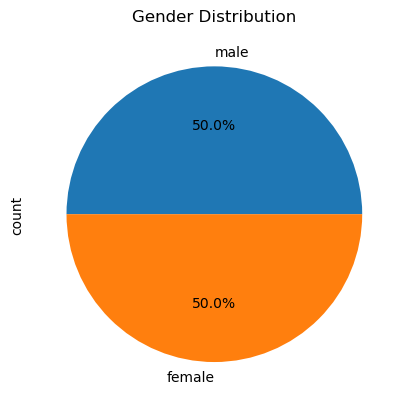

In [13]:
# Gender Distribution 
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution')


<Axes: title={'center': 'Age Group Distribution'}, xlabel='age'>

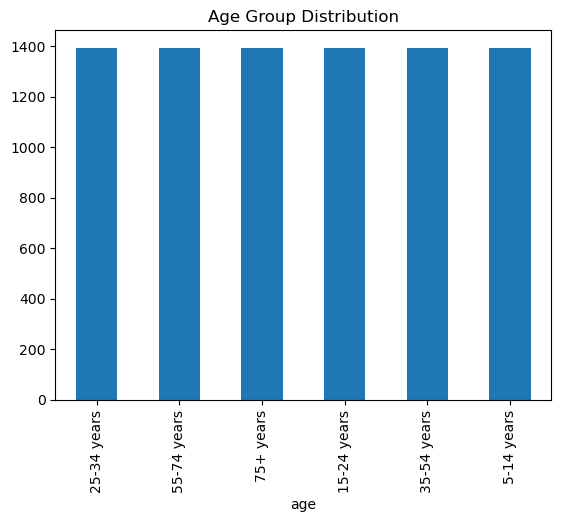

In [14]:
# Age Group Distribution
df['age'].value_counts().plot(kind='bar', title='Age Group Distribution')


<Axes: title={'center': 'Distribution of Suicides'}, ylabel='Frequency'>

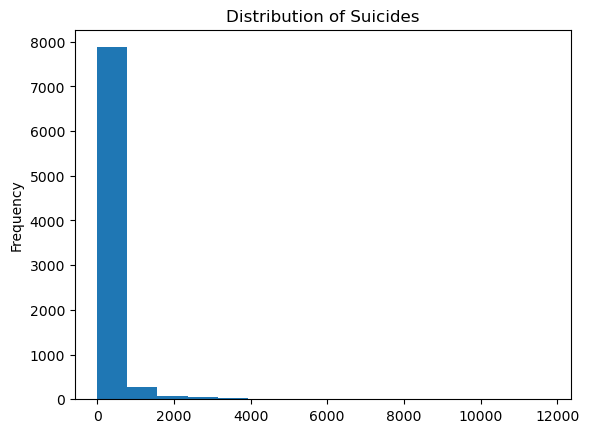

In [15]:
# Distribution of suicide
df['suicides_no'].describe()
df['suicides_no'].plot(kind='hist', bins=15, title='Distribution of Suicides')



<Axes: title={'center': 'Distribution of Suicide Rates (per 100k)'}, ylabel='Density'>

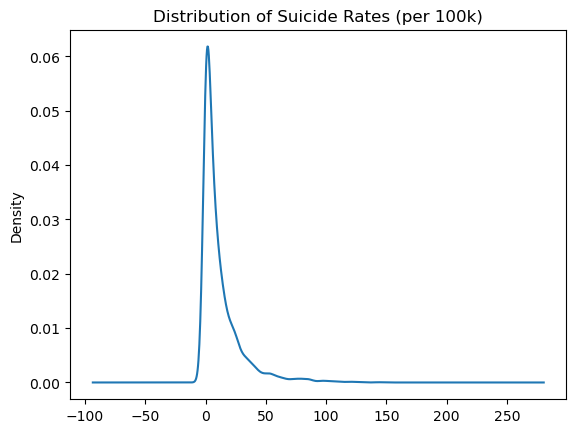

In [16]:
# Distribution of suicide Rates
df['suicides/100k pop'].plot(kind='density', title='Distribution of Suicide Rates (per 100k)')


<Axes: xlabel='HDI for year'>

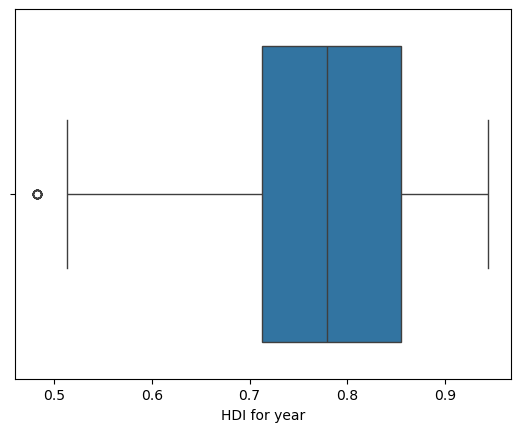

In [17]:
df['HDI for year'].describe()
sns.boxplot(x=df['HDI for year'])


There has been a rise of suicide rates from the year 1985 to 2010 which was the hallmark, then it started to steadily drop


BIVARIATE ANALYSIS

In [ ]:
df.columns

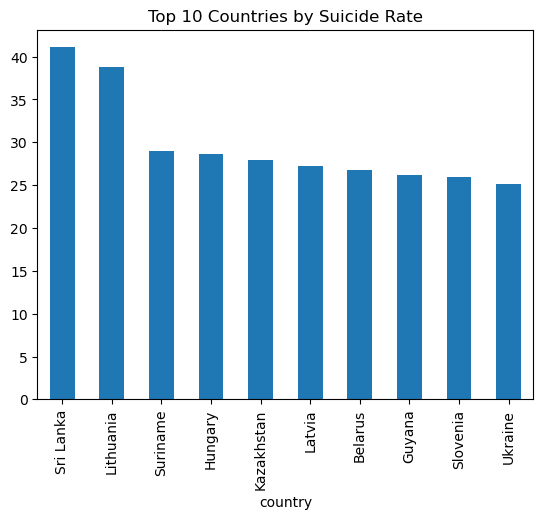

In [21]:
#Country Vs Suicides/100k pop
avg_suicide_rate_by_country = df.groupby('country')['suicides/100k pop'].mean().sort_values(ascending=False)
avg_suicide_rate_by_country.head(10).plot(kind='bar', title='Top 10 Countries by Suicide Rate');
#avg_suicide_rate_by_country.tail(10).plot(kind='bar', title='Bottom 10 Countries by Suicide Rate');


from the above we can clearly see that Sri Lanka has the highest suicide rate cases followed by Lithuania

<Axes: title={'center': 'Trend of Suicide Rates Over Years'}, xlabel='year'>

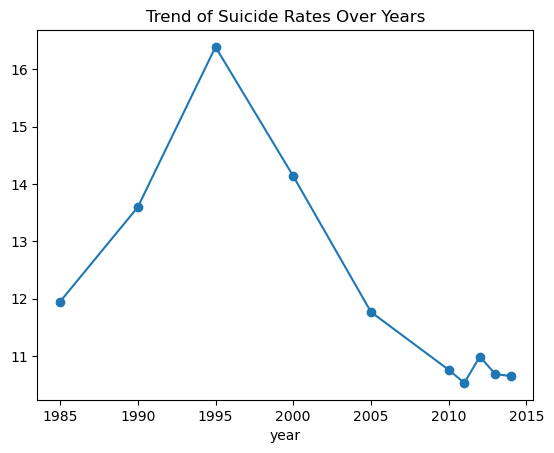

In [22]:
# Year Vs Suicide/100k pop
avg_suicide_rate_by_year = df.groupby('year')['suicides/100k pop'].mean()
avg_suicide_rate_by_year.plot(kind='line', title='Trend of Suicide Rates Over Years', marker='o')


From the above line graph we can a rise in suicide rate from 1985 to 1995 then a sharp decline to 2011 where it rose abit.
what factors influenced the sudden decrease from 1995 to 2011 and what caused the sudden rise again.

<Axes: title={'center': 'Suicide Rates by Sex'}, xlabel='sex', ylabel='suicides/100k pop'>

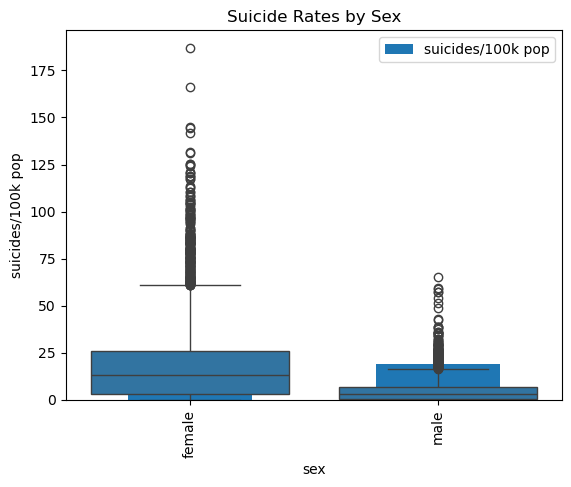

In [27]:
# Sex vs Suicide/100k pop
avg_suicide_rate_by_sex = df.groupby('sex')['suicides/100k pop'].mean()
avg_suicide_rate_by_sex.plot(kind='bar', title='Suicide Rates by Sex')

sns.boxplot(x='sex', y='suicides/100k pop', data=df)


From the above bar chart mostly females are the ones affected with suicide. 
we should question what is causing it 

<Axes: title={'center': 'Suicide Rates by Age Group'}, xlabel='age', ylabel='suicides/100k pop'>

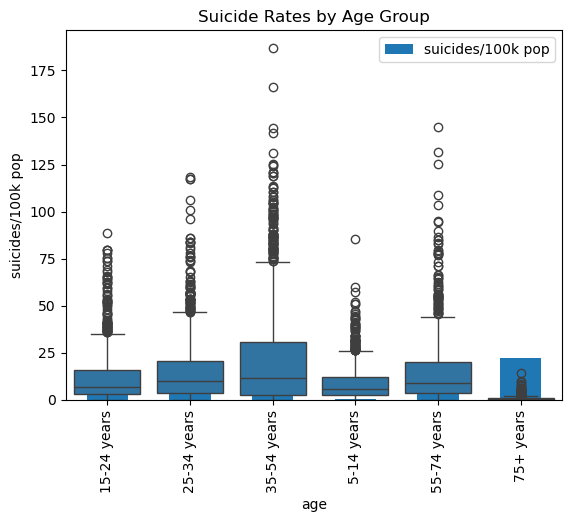

In [28]:
#Age vs Suicide/100k pop
avg_suicide_rate_by_age = df.groupby('age')['suicides/100k pop'].mean()
avg_suicide_rate_by_age.plot(kind='bar', title='Suicide Rates by Age Group')

sns.boxplot(x='age', y='suicides/100k pop', data=df)


Age 35-54 years has the most number of suicide cases

<Axes: title={'center': 'Suicide Rates by Generation'}, xlabel='generation'>

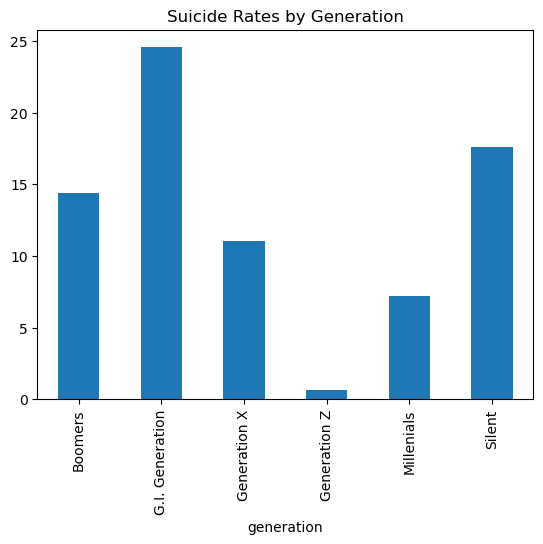

In [29]:
# Generation vs Suicide/100k pop
avg_suicide_rate_by_generation = df.groupby('generation')['suicides/100k pop'].mean()
avg_suicide_rate_by_generation.plot(kind='bar', title='Suicide Rates by Generation')


Generation G.I. is the most affcected with suicide cases

                   HDI for year  suicides/100k pop
HDI for year           1.000000           0.074279
suicides/100k pop      0.074279           1.000000


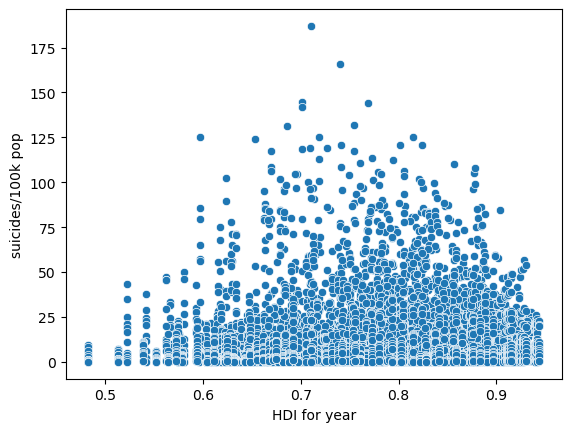

In [30]:
# HDI for the year vs suicide/100k pop
sns.scatterplot(x='HDI for year', y='suicides/100k pop', data=df)

# Correlation
correlation = df[['HDI for year', 'suicides/100k pop']].corr()
print(correlation)


there is positive corelation between HDI and suicide rates

                    gdp_per_capita ($)  suicides/100k pop
gdp_per_capita ($)            1.000000          -0.002339
suicides/100k pop            -0.002339           1.000000


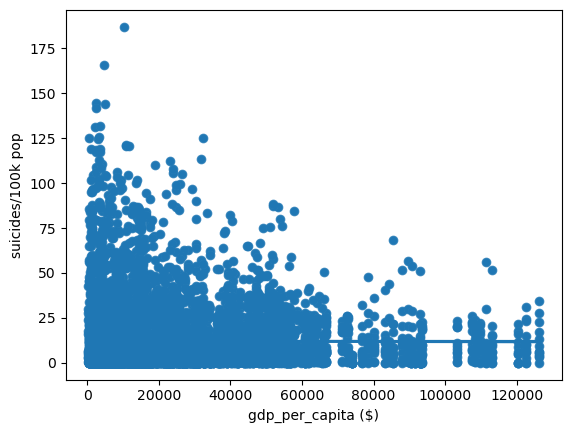

In [31]:
#gdp_per_capita ($) vs suicides/100k pop
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=df)

# Add a regression line
sns.regplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=df)

# Correlation
correlation = df[['gdp_per_capita ($)', 'suicides/100k pop']].corr()
print(correlation)


Text(0.5, 1.0, 'Population vs Suicides Number')

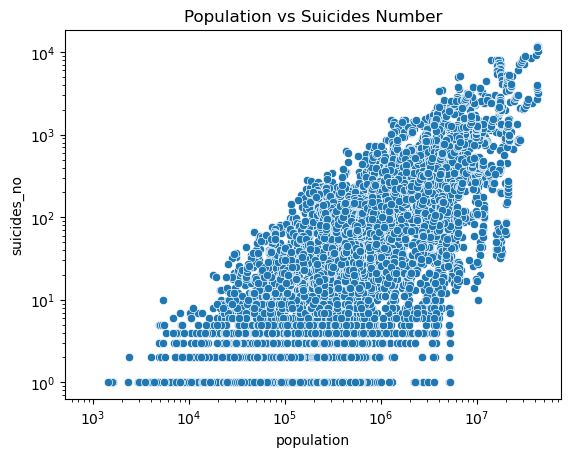

In [32]:
#population vs suicides_no
sns.scatterplot(x='population', y='suicides_no', data=df)

# Add a logarithmic scale
plt.xscale('log')
plt.yscale('log')
plt.title('Population vs Suicides Number')


<Axes: title={'center': 'Total Suicides by Sex'}, xlabel='sex'>

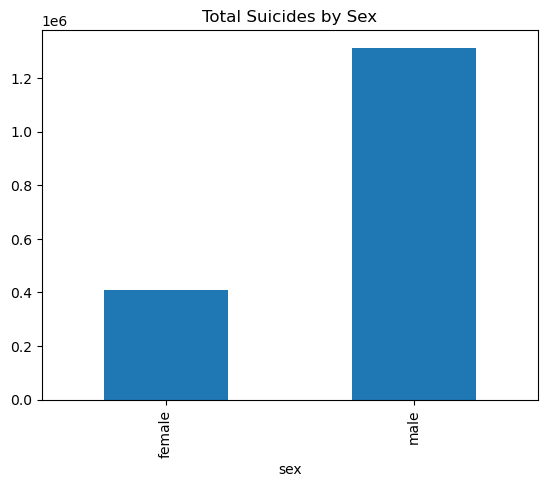

In [33]:
#sex vs suicides_no
total_suicides_by_sex = df.groupby('sex')['suicides_no'].sum()
total_suicides_by_sex.plot(kind='bar', title='Total Suicides by Sex')


Multivariate Analysis

In [35]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation',
       'suicide_proportion'],
      dtype='object')